In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
from ipdb import set_trace

# 权值演化

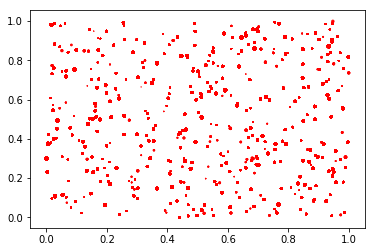

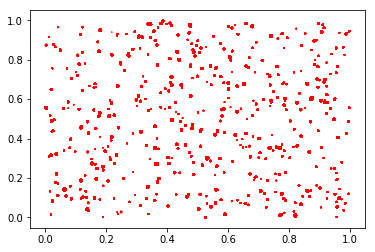

In [7]:
weightsname=['weights1-10.pt','weights9-10.pt']
for p in range(len(weightsname)):
    WeightAlls=torch.load(weightsname[p])
    G=nx.Graph()
    node=[]
    for i in range(len(WeightAlls)-1):
        [Weight,High]=WeightAlls.shape
#         print(WeightAlls[i].shape)
        for j in range(Weight):
            node.append((torch.mean(WeightAlls[j,:]).tolist()+torch.mean(WeightAlls[:,j]).tolist())*1000)
    G.add_nodes_from(node)
#     set_trace()
    nx.draw_networkx_nodes(G, pos=nx.random_layout(G), nodelist=node, node_size=node)
    plt.show()

# 拓扑演化

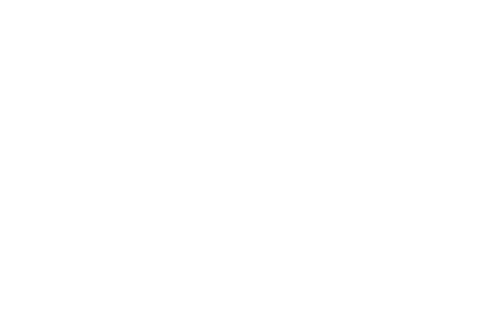

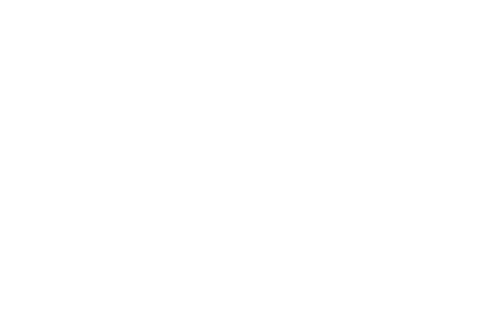

In [9]:
weightsname=['weights1-10.pt','weights9-10.pt']
for p in range(len(weightsname)):
    WeightAlls=torch.load(weightsname[p])
    G=nx.Graph()
    node=[]
    for i in range(len(WeightAlls)-1):
        [Weight,High]=WeightAlls.shape
#         print(WeightAlls[i].shape)
        for j in range(Weight):
            for k in range(High):
                if WeightAlls[j,k]>0.1:
                    G.add_edges_from([(j,k)])
#     set_trace()
    d = dict(G.degree)
    edges=list(G.edges())
    G.remove_edges_from(edges)
    nx.draw(G, nodelist=d.keys(), pos=nx.random_layout(G), node_size=[v*0.1  for v in d.values()])
    plt.show()

# 临近性

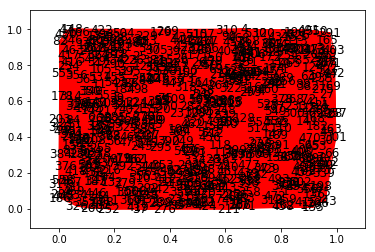

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
from ipdb import set_trace

factor=1000000
weightsname=['weights2-10.pt']
for p in range(len(weightsname)):
    G=nx.Graph()
    node=[]
    WeightAlls=torch.load(weightsname[p])
    [Weight,High]=WeightAlls.shape
    for j in range(Weight):
        for k in range(High):
    #         set_trace()
            if WeightAlls[j,k]>torch.median(WeightAlls)*factor:
                G.add_edge(j,k,color='r',weight=1)
            elif WeightAlls[j,k]<-torch.median(WeightAlls)*factor:
                    G.add_edge(j,k,color='g',weight=1)
    pos = nx.random_layout(G)
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    #     plt.figure(3,figsize=(6,6)) 
    nx.draw_networkx(G, pos, edges=edges, edge_color=colors, width=weights, node_size=0.1)
    plt.savefig('LocalConnectivity.png',dpi=600)
    plt.show()